# 5.4 Python 编程实践———蛋白质消费特征分析

### 注：业务理解部分省略，见教材《数据分析理论与实践：基于经典算法及Python编程实现》（朝乐门主编，机械工业出版社，2022年）是P141-142的内容。

## 1.数据的读入

In [48]:

import pandas as pd
protein = pd.read_table('protein.txt', sep='\t')
pd.read_table?

Signature:
pd.read_table(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Sequence[str] | Mapping[str, Sequence[str]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbos

In [49]:

protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


## 2.数据理解

In [50]:

print(protein.describe())

         RedMeat  WhiteMeat       Eggs       Milk       Fish    Cereals  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    9.828000   7.896000   2.936000  17.112000   4.284000  32.248000   
std     3.347078   3.694081   1.117617   7.105416   3.402533  10.974786   
min     4.400000   1.400000   0.500000   4.900000   0.200000  18.600000   
25%     7.800000   4.900000   2.700000  11.100000   2.100000  24.300000   
50%     9.500000   7.800000   2.900000  17.600000   3.400000  28.000000   
75%    10.600000  10.800000   3.700000  23.300000   5.800000  40.100000   
max    18.000000  14.000000   4.700000  33.700000  14.200000  56.700000   

          Starch       Nuts     Fr&Veg  
count  25.000000  25.000000  25.000000  
mean    4.276000   3.072000   4.136000  
std     1.634085   1.985682   1.803903  
min     0.600000   0.700000   1.400000  
25%     3.100000   1.500000   2.900000  
50%     4.700000   2.400000   3.800000  
75%     5.700000   4.700000   4.90000

In [51]:

print(protein.columns)

Index(['Country', 'RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals',
       'Starch', 'Nuts', 'Fr&Veg'],
      dtype='object')


In [52]:

print(protein.shape)

(25, 10)


## 3 数据规整化处理


In [53]:
from sklearn import preprocessing


sprotein = protein.drop(['Country'], axis=1)


sprotein_scaled = preprocessing.scale(sprotein)
#https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler 

print(sprotein_scaled)

[[ 0.08294065 -1.79475017 -2.22458425 -1.1795703  -1.22503282  0.9348045
  -2.29596509  1.24796771 -1.37825141]
 [-0.28297397  1.68644628  1.24562107  0.40046785 -0.6551106  -0.39505069
  -0.42221774 -0.91079027  0.09278868]
 [ 1.11969872  0.38790475  1.06297868  0.05573225  0.06479116 -0.5252463
   0.88940541 -0.49959828 -0.07694671]
 [-0.6183957  -0.52383718 -1.22005113 -1.2657542  -0.92507375  2.27395937
  -1.98367386  0.32278572  0.03621022]
 [-0.03903089  0.96810416 -0.12419682 -0.6624669  -0.6851065   0.19082957
   0.45219769 -1.01358827 -0.07694671]
 [ 0.23540507  0.8023329   0.69769391  1.13303099  1.68457011 -0.96233157
   0.3272812  -1.21918427 -0.98220215]
 [-0.43543839  1.02336124  0.69769391 -0.86356267  0.33475432 -0.71124003
   1.38907137 -1.16778527 -0.30326057]
 [-0.10001666 -0.82775116 -0.21551801  2.38269753  0.45473794 -0.55314536
   0.51465594 -1.06498727 -1.5479868 ]
 [ 2.49187852  0.55367601  0.33240914  0.34301192  0.42474204 -0.385751
   0.3272812  -0.34540128 

In [54]:
preprocessing.scale?

Signature: preprocessing.scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)
Docstring:
Standardize a dataset along any axis.

Center to the mean and component wise scale to unit variance.

Read more in the :ref:`User Guide <preprocessing_scaler>`.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    The data to center and scale.

axis : {0, 1}, default=0
    Axis used to compute the means and standard deviations along. If 0,
    independently standardize each feature, otherwise (if 1) standardize
    each sample.

with_mean : bool, default=True
    If True, center the data before scaling.

with_std : bool, default=True
    If True, scale the data to unit variance (or equivalently,
    unit standard deviation).

copy : bool, default=True
    If False, try to avoid a copy and scale in place.
    This is not guaranteed to always work in place; e.g. if the data is
    a numpy array with an int dtype, a copy will be returned even with
    co

## 4 模型训练

In [55]:
#kmeans算法在windows上运行时会报如下提示，可以关闭该提示
    # KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads
    
import warnings
warnings.filterwarnings('ignore')

In [56]:
 
from sklearn.cluster import KMeans


In [57]:
#K值的选择
NumberOfClusters = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in NumberOfClusters]
score = [kmeans[i].fit(sprotein_scaled).score(sprotein_scaled) for i in range(len(kmeans))]
score
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.score

[-225.00000000000006,
 -139.50737044831814,
 -125.14318412899527,
 -102.60072047180847,
 -78.83144974984405,
 -73.11291926843256,
 -59.92145522539375,
 -46.871680662414384,
 -45.986985285153544,
 -37.096810251145406,
 -31.707268931948466,
 -27.94649601646635,
 -23.639278703205605,
 -20.537185217375068,
 -16.915248800601983,
 -16.762628376217876,
 -11.377304916866253,
 -9.497149316836323,
 -6.711506904938577]

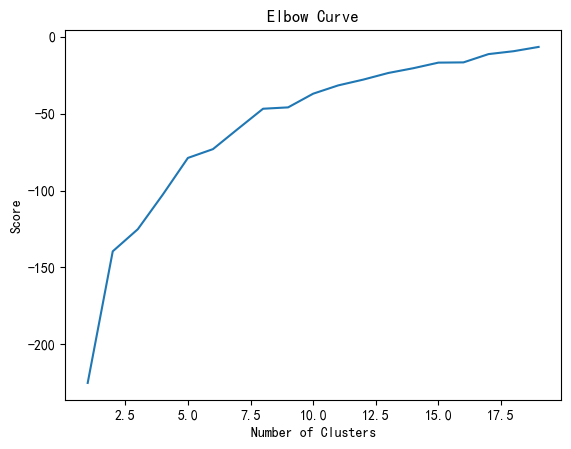

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(NumberOfClusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [59]:

myKmeans = KMeans(algorithm="lloyd",n_clusters=5,n_init=10,max_iter=200,verbose=0)
# myKmeans = KMeans(algorithm="elkan",n_clusters=5,n_init=10,max_iter=200,verbose=0)
 
 

In [60]:
myKmeans.fit(sprotein_scaled)

,n_clusters,5
,init,'k-means++'
,n_init,10
,max_iter,200
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [61]:
myKmeans?

Type:        KMeans
String form: KMeans(max_iter=200, n_clusters=5, n_init=10)
File:        d:\conda\envs\data_analysis\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

    For an example of how to choose an optimal value for `n_clusters` refer to
    :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall inertia. This technique speeds up             convergence. The algorithm implemented is "greedy k-means++". It          

## 5 查看模型

In [62]:
 
print(myKmeans)

KMeans(max_iter=200, n_clusters=5, n_init=10)


## 6 模型预测

In [63]:
y_kmeans = myKmeans.predict(sprotein)
print(y_kmeans)

[1 3 3 1 1 3 3 4 3 1 1 3 1 3 4 1 2 1 1 3 3 3 1 3 1]


## 7 结果输出

In [64]:
protein["所隶属的类簇"] =y_kmeans
protein    

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,所隶属的类簇
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,1
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,3
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,1
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,1
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,3
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,3
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,3
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,1


# 8.模型评价

In [65]:
#提示
    #鉴于读者的反馈指出教材第146页的代码无法正常运行，
    #原因是Bio包的安装和使用出现了问题。
    #为了解决这个问题，作者重新编写了这部分的代码，并在新的代码中避免了Bio包的使用。

In [66]:
# 计算k=5时的轮廓系数
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(sprotein_scaled, y_kmeans)
print("当 k = ",myKmeans.n_clusters,"时,轮廓系数为 :", silhouette_avg)

当 k =  5 时,轮廓系数为 : 0.1662022018722932


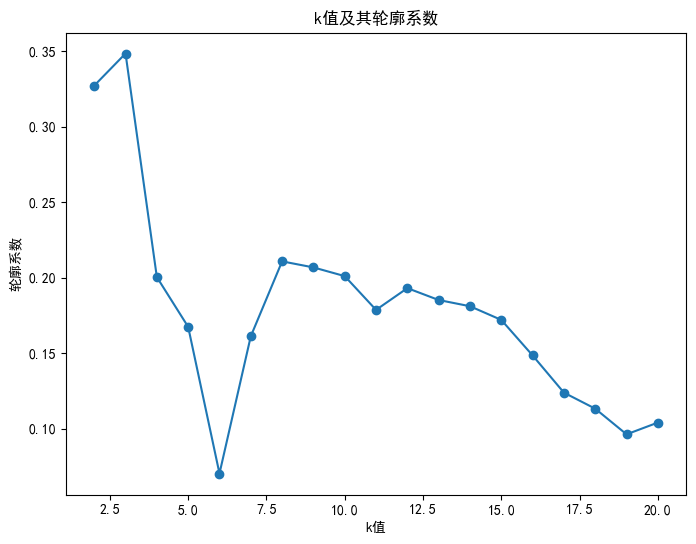

In [67]:
#计算k=2到20时的轮廓系数

# 定义可能的k值范围
k_range = range(2, 21)  

# 用于存储每个k值对应的轮廓系数
silhouette_avgs = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(sprotein_scaled)
    silhouette_avg = silhouette_score(sprotein_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 绘制k值和对应的轮廓系数
plt.figure(figsize=(8, 6))
plt.rcParams['font.family']="simHei" #汉字显示
plt.plot(k_range, silhouette_avgs, 'o-')
plt.xlabel('k值')
plt.ylabel('轮廓系数')
plt.title('k值及其轮廓系数')
plt.show()

# 9.模型调参

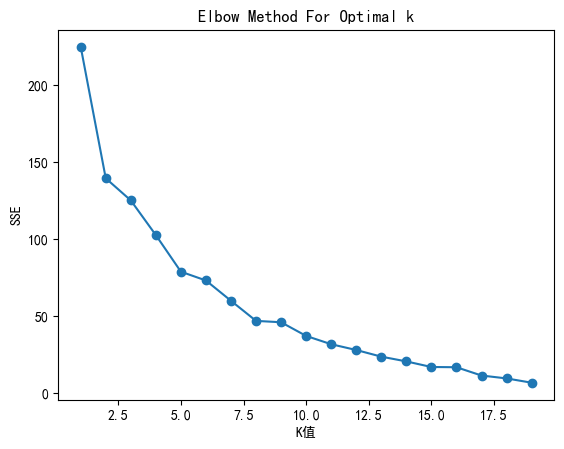

In [68]:
import matplotlib.pyplot as plt

# SSE（Sum of Squared Errors，SSE，内部误差平方和):所有数据点到其所属类簇质心的欧氏距离的平方和

sse = [-x for x in score]  # 因为kmeans[i].fit().score()返回的是负的sse，所以需要取反

plt.plot(NumberOfClusters, sse, marker='o')
plt.xlabel('K值')
plt.ylabel('SSE')  # Sum of Squared Errors
plt.title('Elbow Method For Optimal k')
plt.show()


 # 10.结果可视化

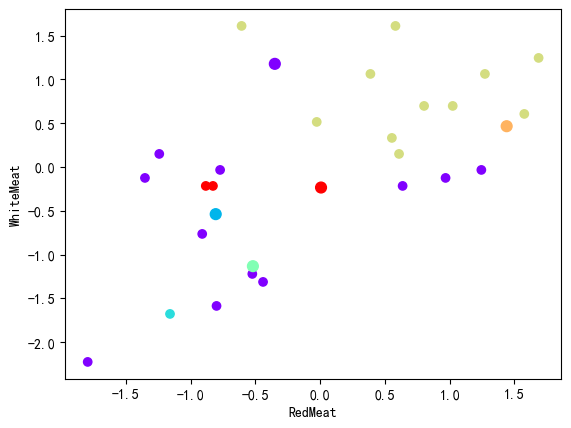

In [69]:
import matplotlib.pyplot as plt

plt.rc('axes', unicode_minus=False)

# 选择前两个特征进行绘制
plt.scatter(sprotein_scaled[:,1]
            , sprotein_scaled[:,2]
            , c=y_kmeans
            , cmap='rainbow')

# 绘制聚类中心
centers = myKmeans.cluster_centers_
plt.scatter(centers[:, 0]
            , centers[:, 1]
            , c=range(myKmeans.n_clusters)
            , cmap='rainbow'
            , s=60)

plt.xlabel("RedMeat")
plt.ylabel("WhiteMeat")

plt.show()

In [70]:
#备注：更多内容参见教材《数据分析理论与实践：基于经典算法及Python编程实现》（朝乐门主编，机械工业出版社，2022年）。